# Heart Disease Prediction
# Dataset
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [1]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv('heart.csv', na_values = '?')
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
985,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
183,42,1,2,130,180,0,1,150,0,0.0,2,0,2,1
526,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
281,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
211,67,1,0,100,299,0,0,125,1,0.9,1,2,2,0
563,44,1,0,112,290,0,0,153,0,0.0,2,1,2,0
921,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
742,63,1,0,130,330,1,0,132,1,1.8,2,3,3,0
185,57,1,0,165,289,1,0,124,0,1.0,1,3,3,0
469,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0


In [2]:
#Checking row & column size
df.shape

(1025, 14)

In [3]:
#Checking column data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
#Checking any duplicate value
df.duplicated().sum()

723

In [5]:
#Drop duplicated value
df = df.drop_duplicates()
df.shape

(302, 14)

In [6]:
#Checking columns name
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
#Checking is there any null value present in the data set
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#Checking relation with target column to every column
df.corr(numeric_only = True)['target']

age        -0.221476
sex        -0.283609
cp          0.432080
trestbps   -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
thalach     0.419955
exang      -0.435601
oldpeak    -0.429146
slope       0.343940
ca         -0.408992
thal       -0.343101
target      1.000000
Name: target, dtype: float64

<Axes: >

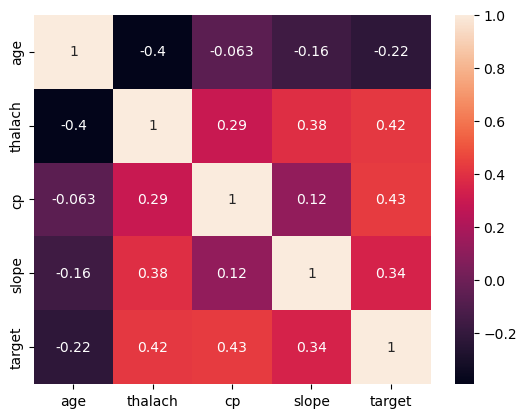

In [9]:
#Showing co-relation with each column
sns.heatmap(df[['age', 'thalach', 'cp', 'slope', 'target']].corr(), annot = True)

<Axes: xlabel='target', ylabel='age'>

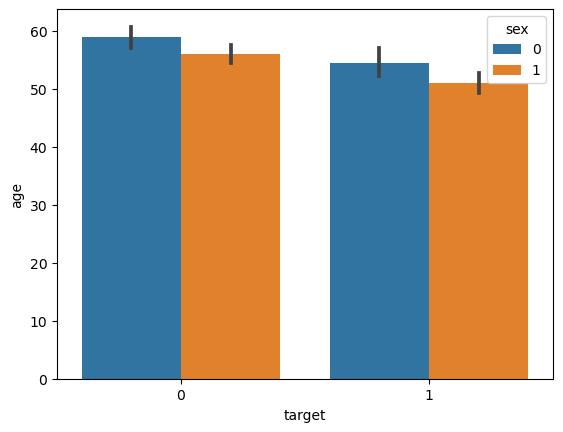

In [10]:
#Male and female heart disease number visualize using bar plot

sns.barplot(x = df['target'], y = df['age'], hue = df['sex'])

In [11]:
#Separting independent and depentdent columns
k_means_df = df.copy()
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
437,67,1,0,120,229,0,0,129,1,2.6,1,2,3
426,54,0,2,160,201,0,1,163,0,0.0,2,1,2
111,53,1,0,142,226,0,0,111,1,0.0,2,0,3
189,64,1,2,125,309,0,1,131,1,1.8,1,0,3
267,67,1,0,120,237,0,1,71,0,1.0,1,0,2


In [12]:
#Spliting data for training and testing
from sklearn.model_selection import train_test_split as split
x_train, x_test, y_train, y_test = split(x, y, test_size = 0.2, random_state = 2)
print(x_train.shape,y_train.shape,x_test.shape, y_test.shape)

(241, 13) (241,) (61, 13) (61,)


In [13]:
#Feature scaling in the training and testing data using Standardization.
from sklearn import preprocessing as pro
scaler = pro.StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
scaled_x_train = pd.DataFrame(x_train_scaled, columns = x_train.columns)
scaled_x_test = pd.DataFrame(x_test_scaled, columns = x_test.columns)
print(scaled_x_train.shape, y_train.shape, scaled_x_test.shape, y_test.shape)

(241, 13) (241,) (61, 13) (61,)


# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression as LR
logistic_regression_model = LR()
logistic_regression_model.fit(scaled_x_train, y_train)

LogisticRegression()

In [15]:
#Prediction on training data set
logistic_regression_scaled_x_train_predict = logistic_regression_model.predict(scaled_x_train).round()
logistic_regression_scaled_training_data_accuracy = accuracy_score(y_train, logistic_regression_scaled_x_train_predict)
print("Logistic Regression Accuracy in Training Data:", logistic_regression_scaled_training_data_accuracy)

Logistic Regression Accuracy in Training Data: 0.8464730290456431


In [16]:
#Prediction on testing data set
logistic_regression_scaled_x_test_predict = logistic_regression_model.predict(scaled_x_test).round()
logistic_regression_scaled_testing_data_accuracy = accuracy_score(y_test, logistic_regression_scaled_x_test_predict)
print("Logistic Regression Accuracy in Testing Data:", logistic_regression_scaled_testing_data_accuracy)

Logistic Regression Accuracy in Testing Data: 0.819672131147541


In [17]:
confusion_matrix(y_test, logistic_regression_scaled_x_test_predict)

array([[23,  8],
       [ 3, 27]], dtype=int64)

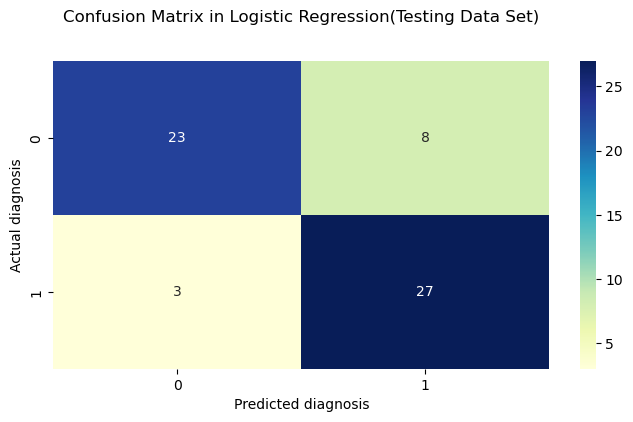

In [18]:
#Create the Confusion Matrix
logistic_regression_cnf_matrix = confusion_matrix(y_test, logistic_regression_scaled_x_test_predict)

#Visualizing the Confusion Matrix
class_names = [0,1]
plt.figure(figsize=(8, 4))
#Setting up and visualizing the plot
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#Creating heatmap
sns.heatmap(pd.DataFrame(logistic_regression_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion Matrix in Logistic Regression(Testing Data Set)', y = 1.1)
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')
plt.show()

# Support Vector Machine(SVM)

In [19]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(scaled_x_train, y_train)

SVC(kernel='linear', probability=True)

In [20]:
#Prediction on training data set
svm_scaled_x_train_predict = svm_model.predict(scaled_x_train)
svm_scaled_training_data_accuracy = accuracy_score(y_train, svm_scaled_x_train_predict)
print("SVM Accuracy in Training Data:", svm_scaled_training_data_accuracy)

SVM Accuracy in Training Data: 0.8547717842323651


In [21]:
#Prediction on testing data set
svm_scaled_x_test_predict = svm_model.predict(scaled_x_test)
svm_scaled_testing_data_accuracy = accuracy_score(y_test, svm_scaled_x_test_predict)
print("SVM Accuracy in Testing Data:", svm_scaled_testing_data_accuracy)

SVM Accuracy in Testing Data: 0.819672131147541


In [22]:
confusion_matrix(y_test, svm_scaled_x_test_predict)

array([[22,  9],
       [ 2, 28]], dtype=int64)

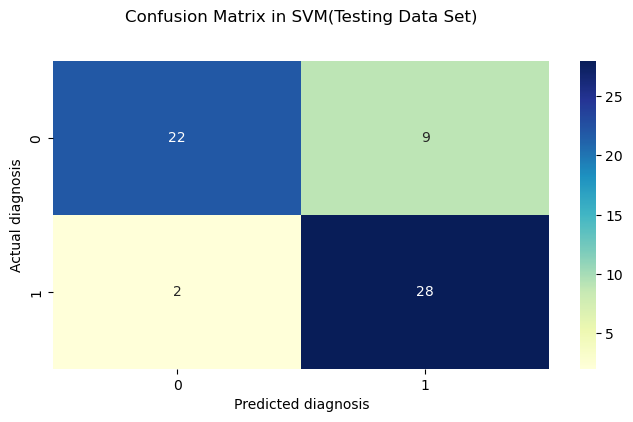

In [23]:
# Create the Confusion Matrix
svm_cnf_matrix = confusion_matrix(y_test, svm_scaled_x_test_predict)

#Visualizing the Confusion Matrix
class_names = [0,1]
plt.figure(figsize=(8, 4))
#Setting up and visualizing the plot
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#Creating heatmap
sns.heatmap(pd.DataFrame(svm_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion Matrix in SVM(Testing Data Set)', y = 1.1)
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')
plt.show()

# Decison Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(
        criterion="entropy", random_state=100,
        max_depth=3, min_samples_leaf=5)
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [25]:
#Prediction on training data set
decison_tree_x_train_predict = decision_tree_model.predict(x_train)
decison_tree_training_data_accuracy = accuracy_score(y_train, decison_tree_x_train_predict)
print("Decision Tree Accuracy in Training Data:", decison_tree_training_data_accuracy)

Decision Tree Accuracy in Training Data: 0.8589211618257261


In [26]:
#Prediction on testing data set
decison_tree_x_test_predict = decision_tree_model.predict(x_test)
decison_tree_testing_data_accuracy = accuracy_score(y_test, decison_tree_x_test_predict)
print("Decision Tree Accuracy in Testing Data:", decison_tree_testing_data_accuracy)

Decision Tree Accuracy in Testing Data: 0.7704918032786885


In [27]:
confusion_matrix(y_test, decison_tree_x_test_predict)

array([[22,  9],
       [ 5, 25]], dtype=int64)

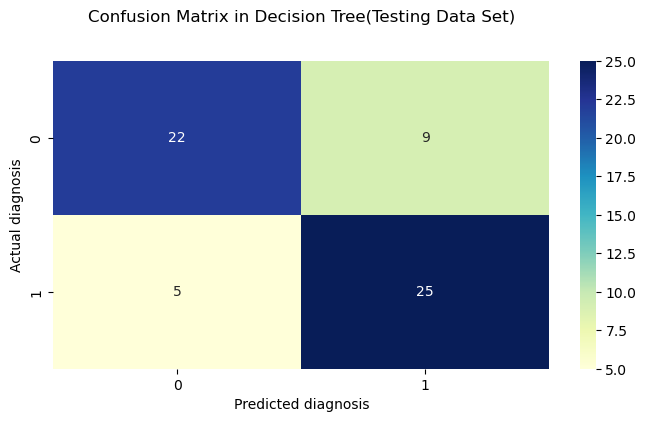

In [28]:
#Create the Confusion Matrix
decison_tree_cnf_matrix = confusion_matrix(y_test, decison_tree_x_test_predict)

#Visualizing the Confusion Matrix
class_names = [0,1]
plt.figure(figsize=(8, 4))
#Setting up and visualizing the plot
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#Creating heatmap
sns.heatmap(pd.DataFrame(decison_tree_cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion Matrix in Decision Tree(Testing Data Set)', y = 1.1)
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')
plt.show()

[Text(0, 0, '0.819672'), Text(0, 0, '0.819672'), Text(0, 0, '0.770492')]

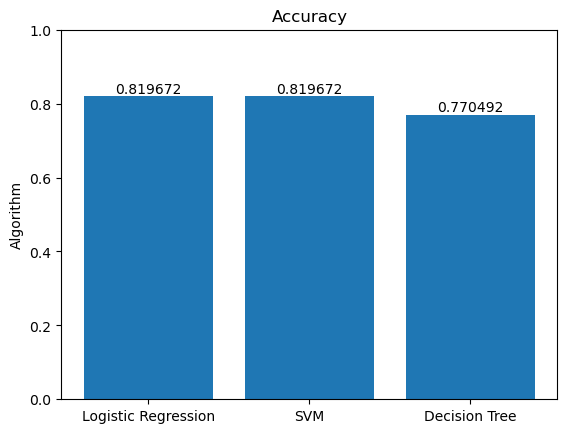

In [29]:
#Accuracy between SVM, Logistic Regression & Decison Tree
algo_name = ['Logistic Regression', 'SVM', 'Decision Tree']
Accuracy_List = [logistic_regression_scaled_testing_data_accuracy,svm_scaled_testing_data_accuracy, decison_tree_testing_data_accuracy]

fig, ax = plt.subplots()
bar_container = ax.bar(algo_name, Accuracy_List)
ax.set(ylabel='Algorithm', title='Accuracy', ylim=(0, 1))
ax.bar_label(bar_container)

# K-Means Clustering

In [30]:
k_means_df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
46,41,1,1,135,203,0,1,132,0,0.0,1,0,1,1
156,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
19,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
224,51,1,0,140,261,0,0,186,1,0.0,2,0,2,1
237,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0


In [31]:
data = df[['age', 'chol']]
data.sample(5)

,age,chol
25,61,307
599,63,195
102,54,309
58,67,212
158,67,564


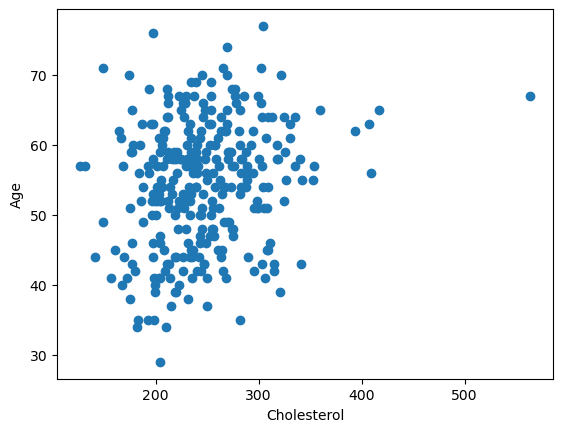

In [32]:
plt.scatter(data.chol, data.age)
plt.xlabel("Cholesterol")
plt.ylabel("Age")
plt.show()

In [33]:
#Again feature scaling new data set using standardization.

scaler.fit(data)
data_scaled = scaler.transform(data)
scaled_data = pd.DataFrame(data_scaled, columns = data.columns)
scaled_data.sample(5)

,age,chol
164,1.171205,0.145158
264,-1.485726,-0.629019
207,-0.378671,-0.377412
180,-1.707137,-0.512893
148,-1.042904,1.190298


In [34]:
#Using elbow method for finding optimal k value
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(scaled_data)
    wcss.append(model.inertia_)

C:\Users\samim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\samim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

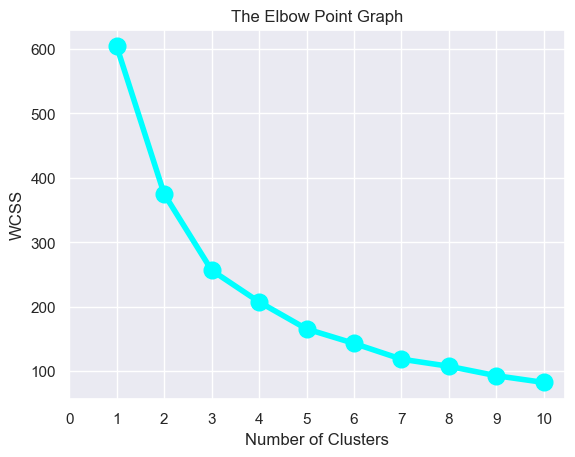

In [35]:
#Visualize elbow method graph
sns.set()
plt.plot(range(1,11), wcss, linewidth=4, markersize=12, marker='o',color = 'cyan')
plt.xticks(np.arange(11))
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
#Training the k-Means Clustering model with optimal value
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(scaled_data)

C:\Users\samim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


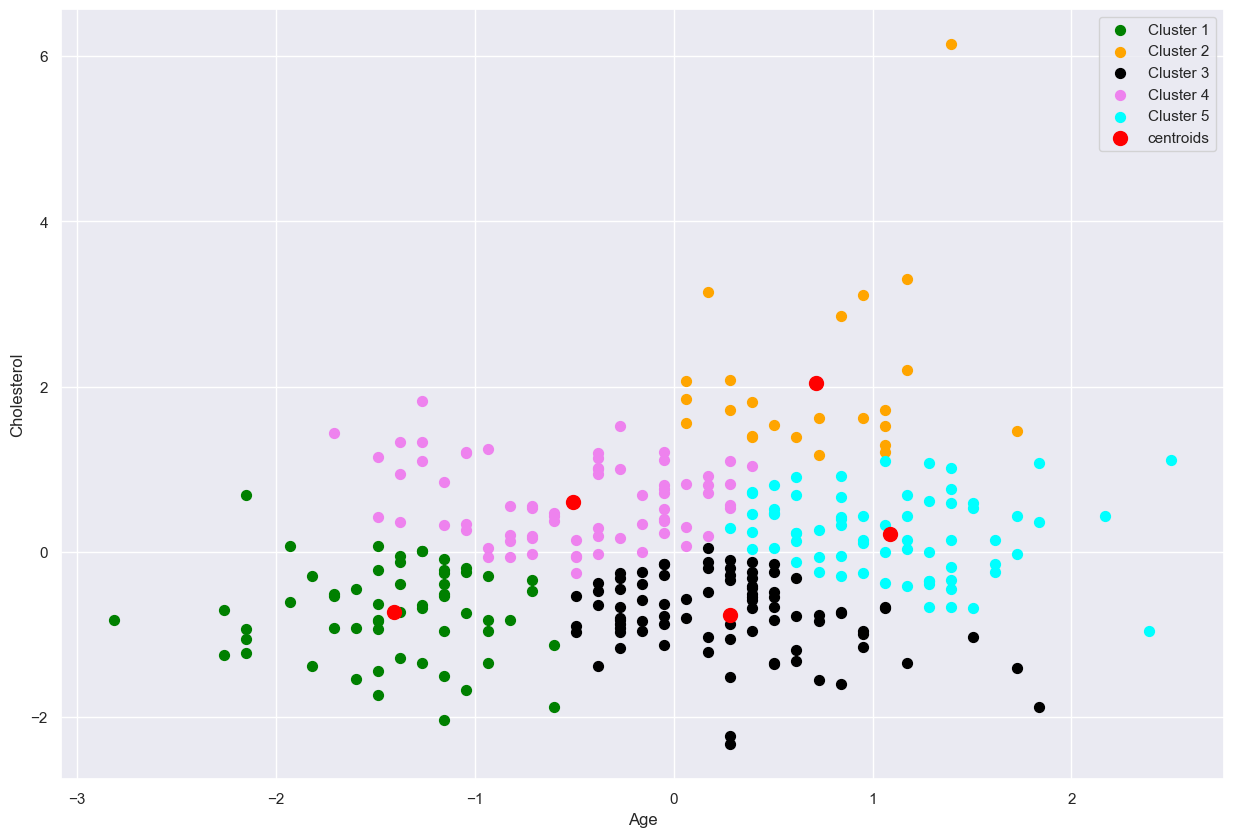

In [37]:
#Visualize clusters
plt.figure(figsize = (15,10))
plt.scatter(data_scaled[y_clusters == 0,0],data_scaled[y_clusters == 0,1],s = 50, c = 'green', label = "Cluster 1")
plt.scatter(data_scaled[y_clusters == 1,0],data_scaled[y_clusters == 1,1],s = 50, c = 'orange', label = "Cluster 2")
plt.scatter(data_scaled[y_clusters == 2,0],data_scaled[y_clusters == 2,1],s = 50, c = 'black', label = "Cluster 3")
plt.scatter(data_scaled[y_clusters == 3,0],data_scaled[y_clusters == 3,1],s = 50, c = 'violet', label = "Cluster 4")
plt.scatter(data_scaled[y_clusters == 4,0],data_scaled[y_clusters == 4,1],s = 50, c = 'cyan', label = "Cluster 5")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s = 100, c = "red", label = "centroids")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.legend()
plt.show()